DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83725 entries, 0 to 83724
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      28152 non-null  datetime64[ns]
 1   tavg      83235 non-null  float64       
 2   tmin      68266 non-null  float64       
 3   tmax      76562 non-null  float64       
 4   prcp      47526 non-null  float64       
 5   location  83725 non-null  object        
 6   snow      0 non-null      float64       
 7   wdir      1718 non-null   float64       
 8   wspd      2553 non-null   float64       
 9   wpgt      0 non-null      float64       
 10  pres      1667 non-null   float64       
 11  tsun      0 non-null      float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 7.7+ MB
None

Descriptive Statistics:
                                time          tavg          tmin  \
count                          28152  83235.000000  68266.000

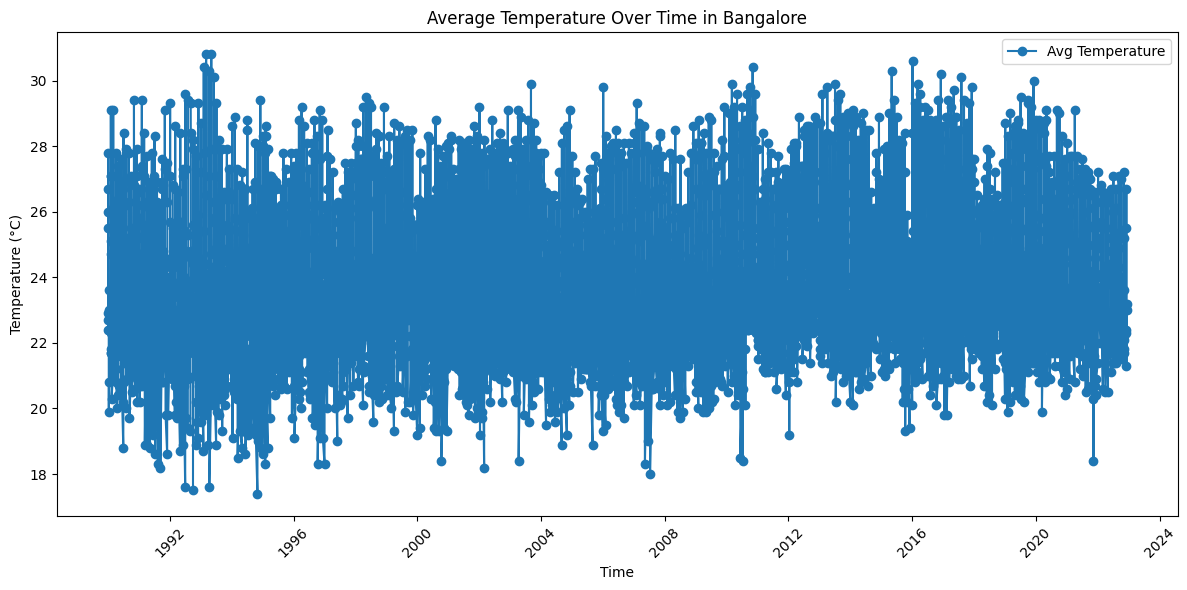

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined weather dataset
data_path = r"C:\mmd assign\Multimodal-Data-Collection\weather_data\processed\combined_weather_data.csv"
df = pd.read_csv(data_path)

# Convert the 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Display basic DataFrame information and descriptive statistics
print("DataFrame Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

# Display the unique locations in the dataset
print("\nUnique Locations:")
print(df['location'].unique())

# --- Plot 1: Time Series of Average Temperature for a Selected Location ---
# Choose a location (modify as necessary, e.g., 'Bangalore')
selected_location = 'Bangalore'
df_loc = df[df['location'].str.contains(selected_location, case=False, na=False)]
df_loc = df_loc.sort_values(by='time')

plt.figure(figsize=(12, 6))
plt.plot(df_loc['time'], df_loc['tavg'], marker='o', linestyle='-', label='Avg Temperature')
plt.title(f"Average Temperature Over Time in {selected_location}")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




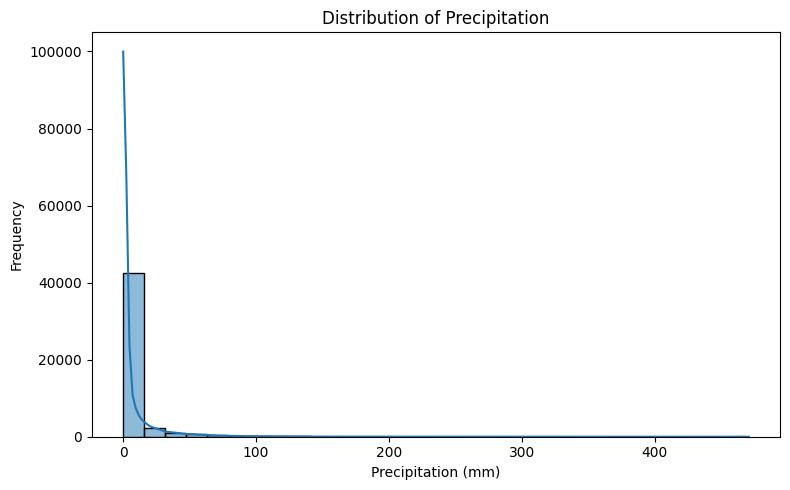

In [2]:
# --- Plot 2: Distribution of Precipitation ---
plt.figure(figsize=(8, 5))
sns.histplot(df['prcp'].dropna(), kde=True, bins=30)
plt.title("Distribution of Precipitation")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



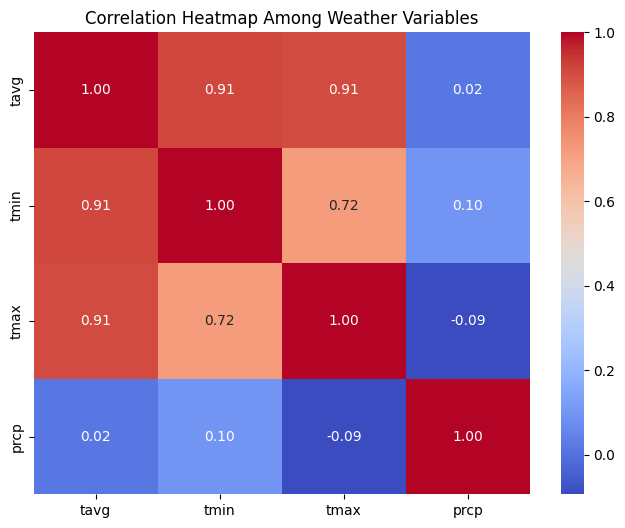

In [3]:
# --- Plot 3: Correlation Heatmap for Weather Variables ---
numeric_cols = ['tavg', 'tmin', 'tmax', 'prcp']
plt.figure(figsize=(8, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap Among Weather Variables")
plt.show()